In [1]:
import numpy as np
import pandas as pd
#import pandas_profiling as pp
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV,KFold,RandomizedSearchCV,StratifiedKFold,train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

In [2]:
df_train = pd.read_csv("C:\\Users\\266251\\Downloads\\application_train.csv")


In [15]:
app_train  = pd.read_csv("C:\\Users\\266251\\Downloads\\application_train.csv")


In [14]:
app_test =  pd.read_csv("C:\\Users\\266251\\Downloads\\application_test.csv")

In [17]:
# Testing data features
app_test = pd.read_csv("C:\\Users\\266251\\Downloads\\application_test.csv")
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (49999, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
app_train['TARGET'].value_counts()

0    236713
1     20799
Name: TARGET, dtype: int64

In [19]:
app_train['TARGET'].astype(int).plot.hist();

In [20]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [21]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 66 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,179905,69.9
COMMONAREA_AVG,179905,69.9
COMMONAREA_MODE,179905,69.9
NONLIVINGAPARTMENTS_MEDI,178800,69.4
NONLIVINGAPARTMENTS_MODE,178800,69.4
NONLIVINGAPARTMENTS_AVG,178800,69.4
FONDKAPREMONT_MODE,176104,68.4
LIVINGAPARTMENTS_MODE,175973,68.3
LIVINGAPARTMENTS_MEDI,175973,68.3
LIVINGAPARTMENTS_AVG,175973,68.3


In [22]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    64
int64      42
object     16
dtype: int64

In [23]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [25]:

from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [26]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (257512, 243)
Testing Features shape:  (49999, 242)


In [27]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (257512, 243)
Testing Features shape:  (49999, 242)


In [28]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    257512.000000
mean         43.944927
std          11.957517
min          20.517808
25%          34.027397
50%          43.158904
75%          53.942466
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [29]:
app_train['DAYS_EMPLOYED'].describe()

count    257512.000000
mean      63930.692845
std      141368.981432
min      -17912.000000
25%       -2756.000000
50%       -1212.000000
75%        -288.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

NameError: name 'plot' is not defined

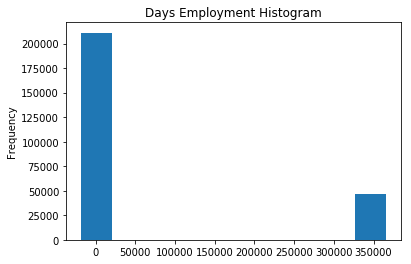

In [31]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plot.xlabel('Days Employment');

In [32]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.68% of loans
The anomalies default on 5.35% of loans
There are 46450 anomalous days of employment


NameError: name 'plt' is not defined

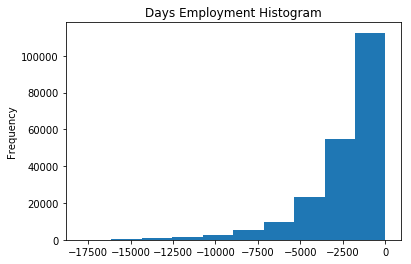

In [33]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [34]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 8924 anomalies in the test data out of 49999 entries


In [35]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 FLAG_DOCUMENT_3                                      0.044211
REG_CITY_NOT_LIVE_CITY                               0.045501
FLAG_EMP_PHONE                                       0.046866
NAME_EDUCATION_TYPE_Secondary / secondary special    0.048644
REG_CITY_NOT_WORK_CITY                               0.051490
DAYS_ID_PUBLISH                                      0.052335
CODE_GENDER_M                                        0.053942
DAYS_LAST_PHONE_CHANGE                               0.055040
REGION_RATING_CLIENT                                 0.057500
NAME_INCOME_TYPE_Working                             0.058169
REGION_RATING_CLIENT_W_CITY                          0.059694
DAYS_EMPLOYED                                        0.074647
DAYS_BIRTH                                           0.078521
TARGET                                               1.000000
FLAG_MOBIL                                                NaN
Name: TARGET, dtype: float64

Most Negati

In [36]:
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07852128096108166

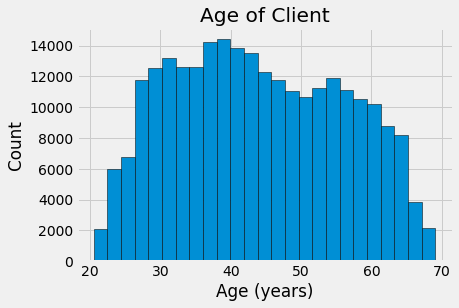

In [38]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

In [39]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,0,19421,53.208219,"(50.0, 55.0]"
1,0,15322,41.978082,"(40.0, 45.0]"
2,0,11120,30.465753,"(30.0, 35.0]"
3,0,11824,32.394521,"(30.0, 35.0]"
4,0,22102,60.553425,"(60.0, 65.0]"
5,0,13642,37.375342,"(35.0, 40.0]"
6,0,11347,31.087671,"(30.0, 35.0]"
7,0,21382,58.580822,"(55.0, 60.0]"
8,0,17849,48.901370,"(45.0, 50.0]"
9,1,9909,27.147945,"(25.0, 30.0]"


In [40]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.124668,8534.850517,23.383152
"(25.0, 30.0]",0.111450,10154.742127,27.821211
"(30.0, 35.0]",0.102832,11855.297982,32.480268
"(35.0, 40.0]",0.088776,13707.276002,37.554181
"(40.0, 45.0]",0.079035,15498.469821,42.461561
"(45.0, 50.0]",0.074093,17323.462341,47.461541
"(50.0, 55.0]",0.067436,19196.851942,52.594115
"(55.0, 60.0]",0.055129,20984.592946,57.492035
"(60.0, 65.0]",0.052728,22781.166037,62.414154


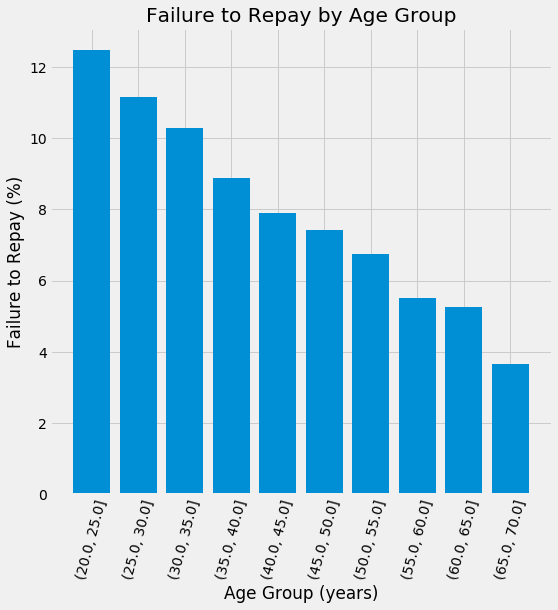

In [41]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [42]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155028,-0.160869,-0.178462,-0.078521
EXT_SOURCE_1,-0.155028,1.000000,0.214232,0.188976,0.600567
EXT_SOURCE_2,-0.160869,0.214232,1.000000,0.110149,0.091628
EXT_SOURCE_3,-0.178462,0.188976,0.110149,1.000000,0.204183
DAYS_BIRTH,-0.078521,0.600567,0.091628,0.204183,1.000000


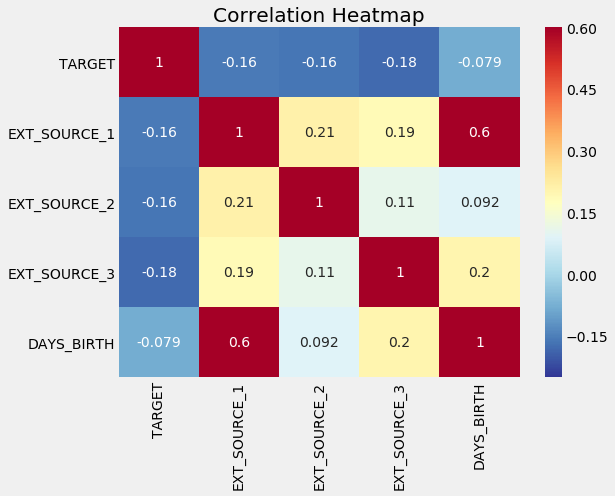

In [43]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The f

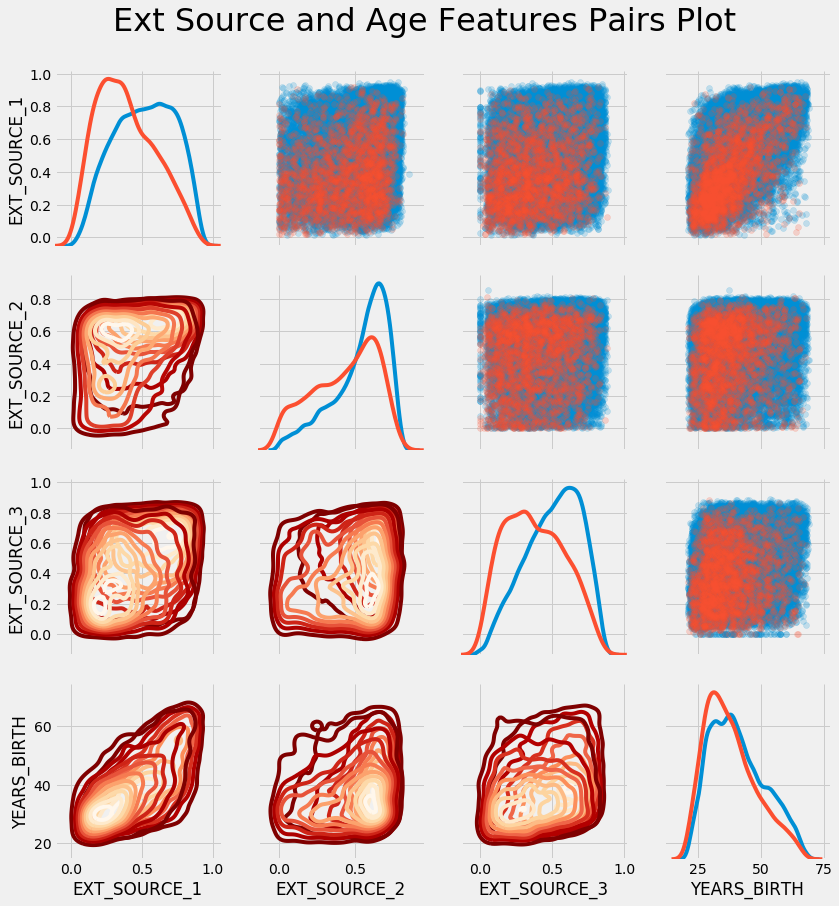

In [44]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

In [45]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [46]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (257512, 35)


In [47]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [48]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193955
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189552
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181499
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176671
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172183
EXT_SOURCE_1 EXT_SOURCE_2                -0.166828
EXT_SOURCE_1 EXT_SOURCE_3                -0.163580
EXT_SOURCE_2                             -0.160684
EXT_SOURCE_2 DAYS_BIRTH                  -0.157323
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.157322
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078521
DAYS_BIRTH^2   -0.076919
DAYS_BIRTH^3   -0.074517
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [49]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (257512, 278)
Testing data with polynomial features shape:   (49999, 278)


In [50]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [51]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

In [52]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (257512, 243)
Testing data shape:  (49999, 243)


In [53]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [54]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [76]:
# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SK_ID_CURR,TARGET
0,100002,0.164362
1,100003,0.077933
2,100004,0.126811
3,100006,0.136138
4,100007,0.163153


In [83]:
submit['TARGET']= submit.TARGET.map( lambda x: 1 if x > 0.11 else 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [84]:
submit.head()

,SK_ID_CURR,TARGET
0,100002,1
1,100003,0
2,100004,1
3,100006,1
4,100007,1


In [86]:
# Save the submission to a csv file
submit.to_csv('log_reg_baseline.csv', index = False)

In [87]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [88]:
# Train on the training data
random_forest.fit(train, train_labels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.8s finished


In [92]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:
submit['TARGET']= submit.TARGET.map( lambda x: 1 if x > 0.08 else 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [103]:
# Save the submission to a csv file
submit.to_csv('RF_basline.csv', index = False)

In [104]:
poly_features_names = list(app_train_poly.columns)

# Impute the polynomial features
imputer = Imputer(strategy = 'median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [105]:
# Train on the training data
random_forest_poly.fit(poly_features, train_labels)

# Make predictions on the test data
predictions = random_forest_poly.predict_proba(poly_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.0s finished


In [106]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [107]:
submit['TARGET']= submit.TARGET.map( lambda x: 1 if x > 0.08 else 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [108]:
submit.to_csv('random_forest_baseline_engineered.csv', index = False)

In [3]:
df_test =  pd.read_csv("C:\\Users\\266251\\Downloads\\application_test.csv")

In [4]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,257512.000000,257512.000000,257512.000000,2.575120e+05,2.575120e+05,257501.000000,2.572720e+05,257512.000000,257512.000000,257512.000000,...,257512.000000,257512.000000,257512.000000,257512.000000,222727.000000,222727.000000,222727.000000,222727.000000,222727.000000,222727.000000
mean,307143.115397,0.080769,0.416509,1.684155e+05,5.988950e+05,27108.806240,5.382673e+05,0.020882,-16039.898366,63930.692845,...,0.008058,0.000575,0.000505,0.000326,0.006268,0.006901,0.034747,0.266833,0.266348,1.903653
std,86047.050997,0.272481,0.721749,1.105872e+05,4.025061e+05,14480.289657,3.693680e+05,0.013845,4364.493540,141368.981432,...,0.089403,0.023967,0.022463,0.018058,0.083078,0.111287,0.206680,0.913544,0.825488,1.870100
min,157876.000000,0.000000,0.000000,2.610000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,232638.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,16542.000000,2.385000e+05,0.010006,-19689.000000,-2756.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,307140.500000,0.000000,0.000000,1.476000e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15753.000000,-1212.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,381476.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12420.000000,-288.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.800009e+07,4.050000e+06,230161.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,22.000000


In [5]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,157876,0,Cash loans,F,N,Y,0,67500.0,343800.0,16155.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,157878,0,Cash loans,M,Y,N,2,247500.0,945000.0,40167.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
2,157879,0,Revolving loans,M,N,Y,2,180000.0,540000.0,27000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
3,157880,0,Cash loans,F,N,Y,0,112500.0,295168.5,16011.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
4,157881,0,Cash loans,F,N,Y,0,63000.0,298512.0,17266.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257512 entries, 0 to 257511
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(64), int64(42), object(16)
memory usage: 239.7+ MB


In [7]:
df_train.shape

(257512, 122)

In [8]:
df_test.shape

(49999, 121)

In [9]:
df_test['TARGET']=np.NAN

In [10]:
df = pd.concat([df_train,df_test])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 49998
Columns: 122 entries, AMT_ANNUITY to YEARS_BUILD_MODE
dtypes: float64(66), int64(40), object(16)
memory usage: 288.6+ MB


In [12]:
df.isnull().sum()

AMT_ANNUITY                         12
AMT_CREDIT                           0
AMT_GOODS_PRICE                    278
AMT_INCOME_TOTAL                     0
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_YEAR       41519
APARTMENTS_AVG                  156061
APARTMENTS_MEDI                 156061
APARTMENTS_MODE                 156061
BASEMENTAREA_AVG                179943
BASEMENTAREA_MEDI               179943
BASEMENTAREA_MODE               179943
CNT_CHILDREN                         0
CNT_FAM_MEMBERS                      2
CODE_GENDER                          0
COMMONAREA_AVG                  214865
COMMONAREA_MEDI                 214865
COMMONAREA_MODE                 214865
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_ID_PUBLISH                      0
DAYS_LAST_PHONE_CHANGE   

In [13]:
df1.WALLSMATERIAL_MODE.isnull().sum()

NameError: name 'df1' is not defined

In [365]:
df1.WALLSMATERIAL_MODE.unique()

array([nan, 'Stone, brick', 'Mixed', 'Panel', 'Wooden', 'Others', 'Block',
       'Monolithic'], dtype=object)

In [366]:
df1.WALLSMATERIAL_MODE.value_counts()

Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Monolithic       1779
Others           1625
Name: WALLSMATERIAL_MODE, dtype: int64

In [291]:
catagorical_columns.isnull().sum()

CODE_GENDER                        0
EMERGENCYSTATE_MODE                0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
FONDKAPREMONT_MODE                 0
HOUSETYPE_MODE                     0
NAME_CONTRACT_TYPE                 0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
NAME_INCOME_TYPE                   0
NAME_TYPE_SUITE                    0
OCCUPATION_TYPE                    0
ORGANIZATION_TYPE                  0
WALLSMATERIAL_MODE            156341
WEEKDAY_APPR_PROCESS_START         0
dtype: int64

In [169]:
df1=df

In [172]:
# Replacing the 'XNA' value with NAN
df1['CODE_GENDER']=df1.CODE_GENDER.replace('XNA',np.nan)

In [175]:
#Replacing the nan value with fillna of MODE operation
df1['CODE_GENDER']=df1.groupby(['NAME_EDUCATION_TYPE'])['CODE_GENDER'].transform(lambda x: x.fillna(x.mode()[0]))


In [190]:
df1.EMERGENCYSTATE_MODE=df1.groupby(['NAME_EDUCATION_TYPE'])['EMERGENCYSTATE_MODE'].transform(lambda x: x.fillna(x.mode()[0]))

In [203]:
df1.FONDKAPREMONT_MODE=df1.groupby(['NAME_EDUCATION_TYPE'])['FONDKAPREMONT_MODE'].transform(lambda x: x.fillna(x.mode()[0]))

In [213]:
df1.HOUSETYPE_MODE=df1.groupby(['NAME_EDUCATION_TYPE'])['HOUSETYPE_MODE'].transform(lambda x: x.fillna(x.mode()[0]))

In [223]:
df1['NAME_FAMILY_STATUS']=df1.NAME_FAMILY_STATUS.replace('Unknown',np.nan)

In [227]:
df1.NAME_FAMILY_STATUS=df1.groupby(['NAME_EDUCATION_TYPE'])['NAME_FAMILY_STATUS'].transform(lambda x: x.fillna(x.mode()[0]))

In [237]:
df1.NAME_TYPE_SUITE=df1.groupby(['NAME_FAMILY_STATUS'])['NAME_TYPE_SUITE'].transform(lambda x: x.fillna(x.mode()[0]))

In [244]:
df1.OCCUPATION_TYPE=df1.groupby(['NAME_EDUCATION_TYPE'])['OCCUPATION_TYPE'].transform(lambda x: x.fillna(x.mode()[0]))

In [368]:
#need to update based on other numeric feature based.
df1.WALLSMATERIAL_MODE=df1.groupby(['NAME_HOUSING_TYPE','OCCUPATION_TYPE'])['WALLSMATERIAL_MODE'].transform(lambda x: x.fillna(x.mode()[0]))

IndexError: index out of bounds

In [300]:
df1.REGION_POPULATION_RELATIVE.isnull().value_counts()

False    307510
True          1
Name: AMT_GOODS_PRICE, dtype: int64

#Numerical Column analysis 

In [370]:

from sklearn.feature_selector import FeatureSelector

import pandas as pd

ModuleNotFoundError: No module named 'sklearn.feature_selector'

In [295]:
numerical_columns.isnull().sum()

AMT_ANNUITY                          0
AMT_CREDIT                           0
AMT_GOODS_PRICE                      1
AMT_INCOME_TOTAL                     0
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_YEAR       41519
APARTMENTS_AVG                  156061
APARTMENTS_MEDI                 156061
APARTMENTS_MODE                 156061
BASEMENTAREA_AVG                179943
BASEMENTAREA_MEDI               179943
BASEMENTAREA_MODE               179943
CNT_CHILDREN                         0
CNT_FAM_MEMBERS                      2
COMMONAREA_AVG                  214865
COMMONAREA_MEDI                 214865
COMMONAREA_MODE                 214865
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_ID_PUBLISH                      0
DAYS_LAST_PHONE_CHANGE               1
DAYS_REGISTRATION        

In [372]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df1):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [373]:
missing_values = missing_values_table(df_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 62 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
COMMONAREA_MEDI,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
FLOORSMIN_AVG,208642,67.8


In [336]:
df1.DAYS_ID_PUBLISH .mean()

-2994.2023732484367

In [375]:
#Column Types
# Number of each type of column
df_train.dtypes.value_counts()

float64    64
int64      42
object     16
dtype: int64

In [376]:
# Number of unique classes in each object column
df_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [378]:
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

In [379]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df_train:
    if df_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(df_train[col])
            # Transform both training and testing data
            df_train[col] = le.transform(df_train[col])
            df_test[col] = le.transform(df_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [380]:
# one-hot encoding of categorical variables
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

print('Training Features shape: ', df_train.shape)
print('Testing Features shape: ', df_test.shape)

Training Features shape:  (257512, 243)
Testing Features shape:  (49999, 243)


In [381]:
(df_train['DAYS_BIRTH'] / -365).describe()

count    257512.000000
mean         43.944927
std          11.957517
min          20.517808
25%          34.027397
50%          43.158904
75%          53.942466
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [382]:
df_train['DAYS_EMPLOYED'].describe()

count    257512.000000
mean      63930.692845
std      141368.981432
min      -17912.000000
25%       -2756.000000
50%       -1212.000000
75%        -288.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

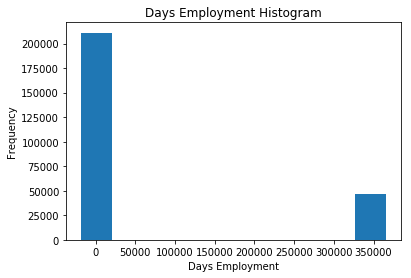

In [384]:
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
df_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [385]:
anom = df_train[df_train['DAYS_EMPLOYED'] == 365243]
non_anom = df_train[df_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.68% of loans
The anomalies default on 5.35% of loans
There are 46450 anomalous days of employment


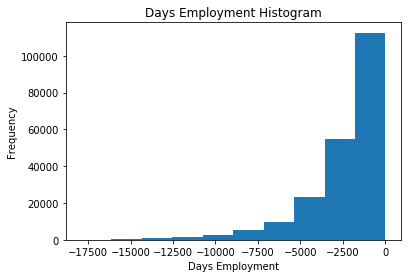

In [386]:
#Replacing Anomalices 
# Create an anomalous flag column
df_train['DAYS_EMPLOYED_ANOM'] = df_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
df_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

df_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [389]:
df_test['DAYS_EMPLOYED_ANOM'] = df_test["DAYS_EMPLOYED"] == 365243
df_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (df_test["DAYS_EMPLOYED_ANOM"].sum(), len(df_test)))

There are 0 anomalies in the test data out of 49999 entries


In [394]:
# Age information into a separate dataframe
age_data = df_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,0,-19421,-53.208219,NaN
1,0,-15322,-41.978082,NaN
2,0,-11120,-30.465753,NaN
3,0,-11824,-32.394521,NaN
4,0,-22102,-60.553425,NaN
5,0,-13642,-37.375342,NaN
6,0,-11347,-31.087671,NaN
7,0,-21382,-58.580822,NaN
8,0,-17849,-48.901370,NaN
9,1,-9909,-27.147945,NaN


In [395]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",NaN,NaN,NaN
"(25.0, 30.0]",NaN,NaN,NaN
"(30.0, 35.0]",NaN,NaN,NaN
"(35.0, 40.0]",NaN,NaN,NaN
"(40.0, 45.0]",NaN,NaN,NaN
"(45.0, 50.0]",NaN,NaN,NaN
"(50.0, 55.0]",NaN,NaN,NaN
"(55.0, 60.0]",NaN,NaN,NaN
"(60.0, 65.0]",NaN,NaN,NaN


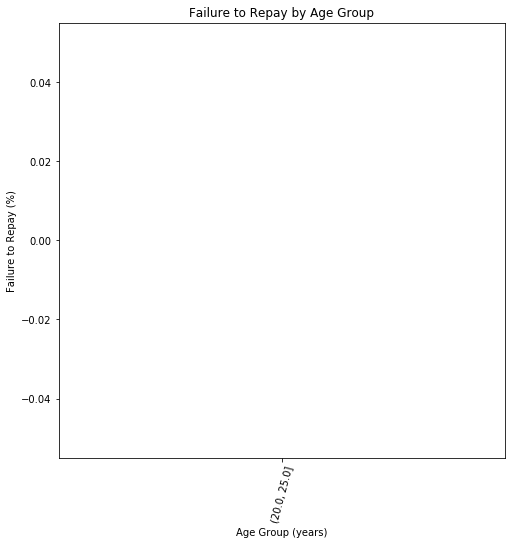

In [396]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [397]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = df_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155028,-0.160869,-0.178462,0.078521
EXT_SOURCE_1,-0.155028,1.000000,0.214232,0.188976,-0.600567
EXT_SOURCE_2,-0.160869,0.214232,1.000000,0.110149,-0.091628
EXT_SOURCE_3,-0.178462,0.188976,0.110149,1.000000,-0.204183
DAYS_BIRTH,0.078521,-0.600567,-0.091628,-0.204183,1.000000


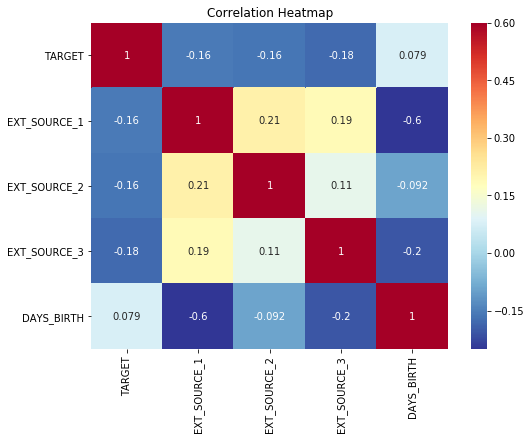

In [398]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

In [399]:
# Make a new dataframe for polynomial features
poly_features = df_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = df_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [400]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (257512, 35)


In [401]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [402]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193955
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189552
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176671
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172183
EXT_SOURCE_1 EXT_SOURCE_2                -0.166828
EXT_SOURCE_1 EXT_SOURCE_3                -0.163580
EXT_SOURCE_2                             -0.160684
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.157322
EXT_SOURCE_3                             -0.155449
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150319
Name: TARGET, dtype: float64
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH    0.156214
EXT_SOURCE_2 DAYS_BIRTH                 0.157323
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.181499
TARGET                                  1.000000
1                                            NaN
Name: TARGET, dtype: float64


In [405]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = df_train['SK_ID_CURR']
app_train_poly = df_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = df_test['SK_ID_CURR']
app_test_poly = df_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (257512, 278)
Testing data with polynomial features shape:   (49999, 278)


In [406]:
app_train_domain = df_train.copy()
app_test_domain = df_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [407]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


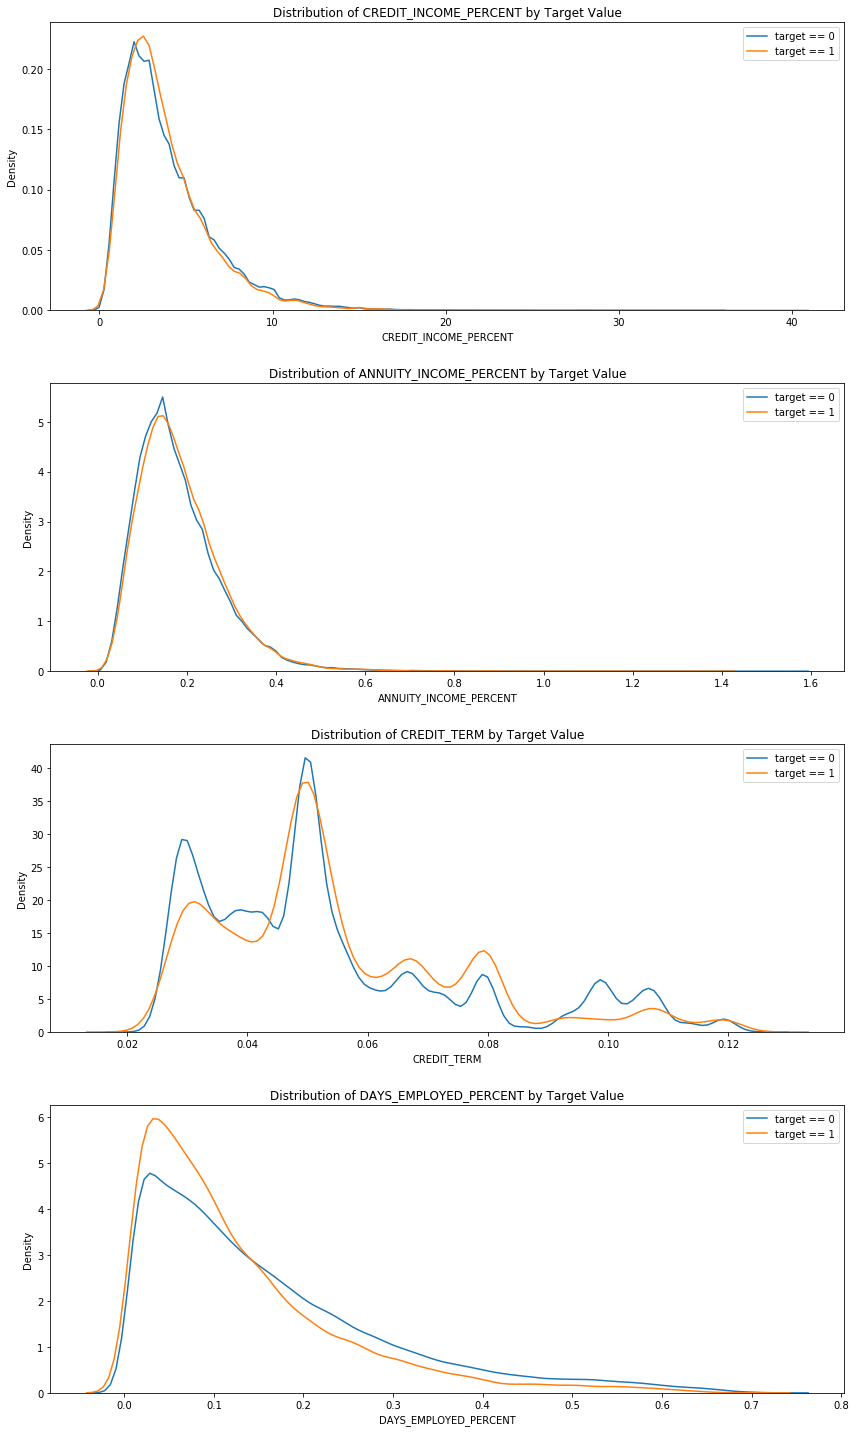

In [408]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [337]:
df1.DAYS_ID_PUBLISH .min()

-7197

In [411]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
if 'TARGET' in df_train:
    train = df_train.drop(columns = ['TARGET'])
else:
    train = df_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = df_test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(df_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

ValueError: X has 244 features per sample, expected 243

In [ ]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

In [412]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,0,1,0,1,0,False
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,1,0,0,0,0,0,0,1,0,False
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,False


In [338]:
df1.DAYS_ID_PUBLISH .max()

0

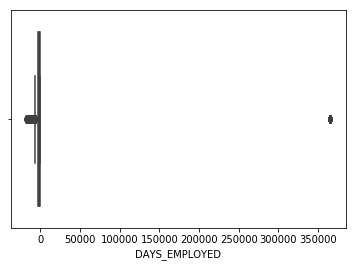

In [339]:
#Outlier
import seaborn as sns
sns.boxplot(x=df1['DAYS_EMPLOYED'])

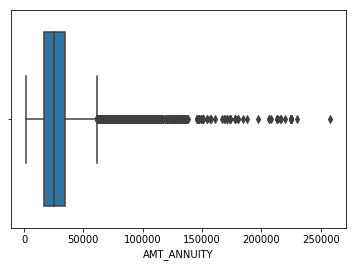

In [340]:
#Outlier AMT_ANNUITY
import seaborn as sns
sns.boxplot(x=df1['AMT_ANNUITY'])

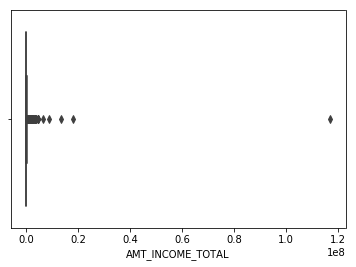

In [341]:
#Outlier AMT_INCOME_TOTAL
import seaborn as sns
sns.boxplot(x=df1['AMT_INCOME_TOTAL'])

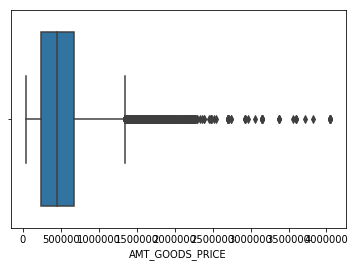

In [342]:
#Outlier AMT_GOODS_PRICE
import seaborn as sns
sns.boxplot(x=df1['AMT_GOODS_PRICE'])

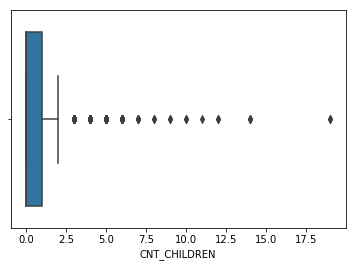

In [346]:
#Outlier CNT_CHILDREN
import seaborn as sns
sns.boxplot(x=df1['CNT_CHILDREN'])

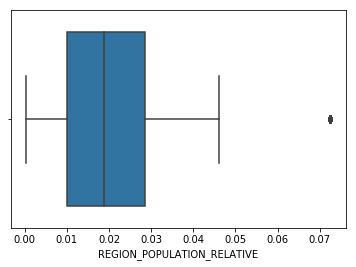

In [348]:
#Outlier CNT_CHILDREN
import seaborn as sns
sns.boxplot(x=df1['REGION_POPULATION_RELATIVE'])

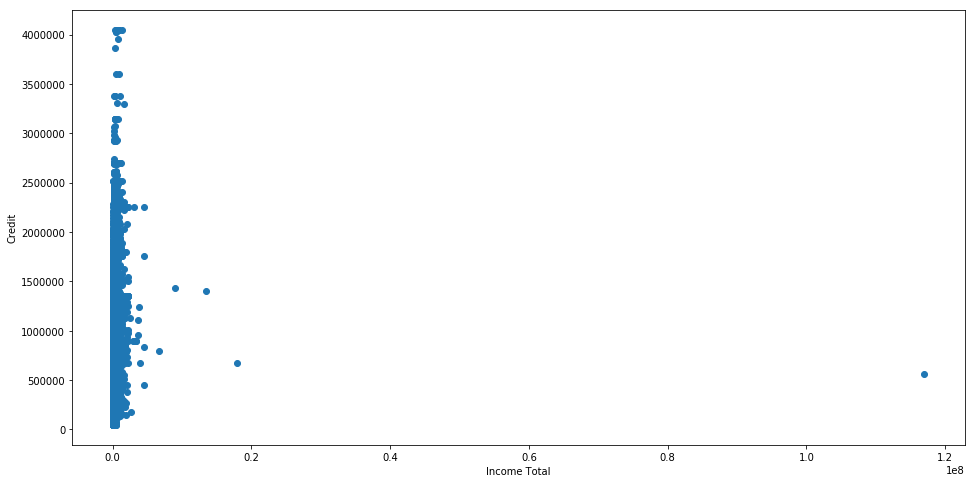

In [363]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df1['AMT_INCOME_TOTAL'], df1['AMT_CREDIT'])
ax.set_xlabel('Income Total')
ax.set_ylabel('Credit')
plt.show()

In [354]:
# Finding Outlier by Stats Zscore

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(numerical_columns))
print(z)

[[0.75576461 0.63411742        nan ...        nan        nan        nan]
 [0.90098004 0.85958383        nan ...        nan        nan        nan]
 [0.00749725 0.14665205        nan ...        nan        nan        nan]
 ...
 [0.05469088 0.74777984        nan ...        nan        nan        nan]
 [0.53740283 0.55060233        nan ...        nan        nan        nan]
 [0.85263573 0.85548932        nan ...        nan        nan        nan]]


In [355]:
threshold = 3
print(np.where(z > 3))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


(array([     0,      1,      2, ..., 307504, 307505, 307508], dtype=int64), array([93, 56, 74, ..., 46, 90, 58], dtype=int64))


In [356]:
# First array contains the list of the row and second array contains the respective column numbers
print(z[0][93])

3.4339730714390235


In [357]:
#IQR
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

AMT_ANNUITY                      18072.000000
AMT_CREDIT                      538650.000000
AMT_GOODS_PRICE                 441000.000000
AMT_INCOME_TOTAL                 90000.000000
AMT_REQ_CREDIT_BUREAU_DAY            0.000000
AMT_REQ_CREDIT_BUREAU_HOUR           0.000000
AMT_REQ_CREDIT_BUREAU_MON            0.000000
AMT_REQ_CREDIT_BUREAU_QRT            0.000000
AMT_REQ_CREDIT_BUREAU_WEEK           0.000000
AMT_REQ_CREDIT_BUREAU_YEAR           3.000000
APARTMENTS_AVG                       0.090800
APARTMENTS_MEDI                      0.090600
APARTMENTS_MODE                      0.091400
BASEMENTAREA_AVG                     0.068000
BASEMENTAREA_MEDI                    0.067900
BASEMENTAREA_MODE                    0.071700
CNT_CHILDREN                         1.000000
CNT_FAM_MEMBERS                      1.000000
COMMONAREA_AVG                       0.043700
COMMONAREA_MEDI                      0.043400
COMMONAREA_MODE                      0.041800
DAYS_BIRTH                        

In [362]:

df1.query('DAYS_EMPLOYED==365243').head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,TARGET,TOTALAREA_MODE,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
1,40167.0,945000.0,945000.0,247500.0,0.0,0.0,0.0,1.0,0.0,2.0,...,0.0,NaN,NaN,WEDNESDAY,NaN,NaN,NaN,NaN,NaN,NaN
4,17266.5,298512.0,270000.0,63000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,THURSDAY,NaN,NaN,NaN,NaN,NaN,NaN
7,20677.5,545040.0,450000.0,90000.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,NaN,NaN,TUESDAY,NaN,NaN,NaN,NaN,NaN,NaN
19,34573.5,348264.0,315000.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,WEDNESDAY,NaN,NaN,NaN,NaN,NaN,NaN
22,16735.5,167895.0,157500.0,51750.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,TUESDAY,NaN,NaN,NaN,NaN,NaN,NaN


In [265]:
df1.AMT_ANNUITY=df1.groupby(['AMT_INCOME_TOTAL'])['AMT_ANNUITY'].transform(lambda x: x.fillna(x.mean()))

In [293]:
df1.AMT_GOODS_PRICE=df1.groupby(['AMT_INCOME_TOTAL'])['AMT_GOODS_PRICE'].transform(lambda x: x.fillna(x.mean()))

In [320]:
def feature_scaling(df1):
    df1 -= df1.min()
    df1 /= df1.max()
    return df1

In [ ]:
df1['AMT_ANNUITY'] = feature_scaling(df1['AMT_ANNUITY'])
df1['AMT_GOODS_PRICE'] = feature_scaling(df1['AMT_GOODS_PRICE'])
df1['CNT_CHILDREN'] = feature_scaling(df1['CNT_CHILDREN'])
df1['AMT_ANNUITY'] = feature_scaling(df1['AMT_ANNUITY'])
df1['AMT_GOODS_PRICE'] = feature_scaling(df1['AMT_GOODS_PRICE'])
df1['REGION_POPULATION_RELATIVE'] = feature_scaling(df1['REGION_POPULATION_RELATIVE'])
df1['SEC_INSTAL_AMT'] = feature_scaling(df1['SEC_INSTAL_AMT'])

In [289]:
catagorical_columns=df1.select_dtypes(include='object')

In [294]:
numerical_columns=df1.select_dtypes(exclude='object')

In [183]:
catagorical_columns.head()

,CODE_GENDER,EMERGENCYSTATE_MODE,FLAG_OWN_CAR,FLAG_OWN_REALTY,FONDKAPREMONT_MODE,HOUSETYPE_MODE,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,OCCUPATION_TYPE,ORGANIZATION_TYPE,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START
0,F,NaN,N,Y,NaN,NaN,Cash loans,Secondary / secondary special,Married,House / apartment,State servant,Unaccompanied,Medicine staff,Medicine,NaN,TUESDAY
1,M,NaN,Y,N,NaN,NaN,Cash loans,Secondary / secondary special,Married,House / apartment,Pensioner,Unaccompanied,NaN,XNA,NaN,WEDNESDAY
2,M,No,N,Y,NaN,NaN,Revolving loans,Secondary / secondary special,Married,House / apartment,Working,Unaccompanied,Sales staff,Business Entity Type 3,"Stone, brick",SATURDAY
3,F,No,N,Y,org spec account,block of flats,Cash loans,Higher education,Married,House / apartment,Working,Unaccompanied,Laborers,Business Entity Type 2,Mixed,SUNDAY
4,F,NaN,N,Y,NaN,NaN,Cash loans,Secondary / secondary special,Civil marriage,Municipal apartment,Pensioner,Unaccompanied,NaN,XNA,NaN,THURSDAY


In [186]:
catagorical_columns.columns

"""'CODE_GENDER', 'EMERGENCYSTATE_MODE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'NAME_CONTRACT_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE', 'WALLSMATERIAL_MODE',
       'WEEKDAY_APPR_PROCESS_START'"""

Index(['CODE_GENDER', 'EMERGENCYSTATE_MODE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'NAME_CONTRACT_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE', 'WALLSMATERIAL_MODE',
       'WEEKDAY_APPR_PROCESS_START'],
      dtype='object')

In [ ]:
encode=pd.get_dummies(catagorical_columns.drop(columns=["Item_Identifier","source"]))

In [ ]:
df1=pd.concat([df1,pd.get_dummies(df1.NAME_CONTRACT_TYPE,df1.)],axis=1)

In [35]:
#from sklearn.feature_selection import info_gain
from sklearn.feature_selection import selectkbest,chi2
from sklearn.ensamble import IsolationForest

ImportError: cannot import name 'selectkbest'

In [288]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
class SelectKBest(_BaseFilter):
    """Select features according to the k highest scores.
    Read more in the :ref:`User Guide <univariate_feature_selection>`.
    Parameters
    ----------
    score_func : callable
        Function taking two arrays X and y, and returning a pair of arrays
        (scores, pvalues) or a single array with scores.
        Default is f_classif (see below "See also"). The default function only
        works with classification tasks.
    k : int or "all", optional, default=10
        Number of top features to select.
        The "all" option bypasses selection, for use in a parameter search.
    Attributes
    ----------
    scores_ : array-like, shape=(n_features,)
        Scores of features.
    pvalues_ : array-like, shape=(n_features,)
        p-values of feature scores, None if `score_func` returned only scores.
    Examples
    --------
    >>> from sklearn.datasets import load_digits
    >>> from sklearn.feature_selection import SelectKBest, chi2
    >>> X, y = load_digits(return_X_y=True)
    >>> X.shape
    (1797, 64)
    >>> X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
    >>> X_new.shape
    (1797, 20)
    Notes
    -----
    Ties between features with equal scores will be broken in an unspecified
    way.
    See also
    --------
    f_classif: ANOVA F-value between label/feature for classification tasks.
    mutual_info_classif: Mutual information for a discrete target.
    chi2: Chi-squared stats of non-negative features for classification tasks.
    f_regression: F-value between label/feature for regression tasks.
    mutual_info_regression: Mutual information for a continuous target.
    SelectPercentile: Select features based on percentile of the highest scores.
    SelectFpr: Select features based on a false positive rate test.
    SelectFdr: Select features based on an estimated false discovery rate.
    SelectFwe: Select features based on family-wise error rate.
    GenericUnivariateSelect: Univariate feature selector with configurable mode.
    """

    def __init__(self, score_func=f_classif, k=10):
        super().__init__(score_func)
        self.k = k

    def _check_params(self, X, y):
        if not (self.k == "all" or 0 <= self.k <= X.shape[1]):
            raise ValueError("k should be >=0, <= n_features = %d; got %r. "
                             "Use k='all' to return all features."
                             % (X.shape[1], self.k))

    def _get_support_mask(self):
        check_is_fitted(self, 'scores_')

        if self.k == 'all':
            return np.ones(self.scores_.shape, dtype=bool)
        elif self.k == 0:
            return np.zeros(self.scores_.shape, dtype=bool)
        else:
            scores = _clean_nans(self.scores_)
            mask = np.zeros(scores.shape, dtype=bool)

            # Request a stable sort. Mergesort takes more memory (~40MB per
            # megafeature on x86-64).
            mask[np.argsort(scores, kind="mergesort")[-self.k:]] = 1
            return mask